In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

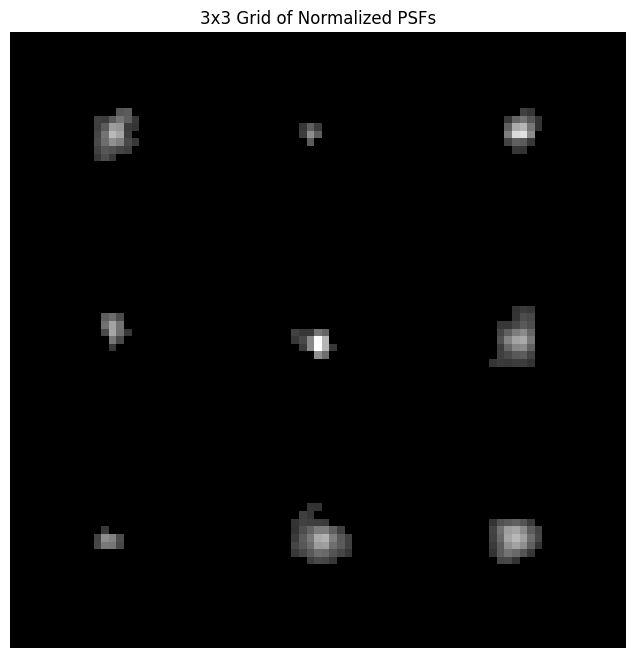

In [16]:
psfs = []
for i in range(1,10):

    psf = cv2.imread(f'psf{i}.jpeg', cv2.IMREAD_GRAYSCALE)    
    psf = psf - np.min(psf)
    psf = psf / np.sum(psf)

    psf[psf < 0.004] = 0
    
    psfs.append(psf)

psf_grid = np.zeros((81, 81))  
for i in range(3):
    for j in range(3):
        idx = i*3 + j
        psf_grid[i*27:(i+1)*27, j*27:(j+1)*27] = psfs[idx]

plt.figure(figsize=(8,8))
plt.imshow(psf_grid, cmap='gray')
plt.title('3x3 Grid of Normalized PSFs')
plt.axis('off')
plt.show()

In [22]:
psfs = np.array(psfs).transpose(1,2,0)

np.save('phone_psf.npy', psfs)